In [1]:
import requests

token = "eyJvcmciOiI1ZTU1NGUxOTI3NGE5NjAwMDEyYTNlYjEiLCJpZCI6IjcxZGFmYmI1NGZkYTQ4NjI5ZGU0Mjk5OTM1ZDlmMzdmIiwiaCI6Im11cm11cjEyOCJ9"
headers = {"Authorization": token}

request = requests.get(url='https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations/06242?datetime=2023-01-01T00%3A00%3A00Z%2F2023-01-31T04%3A10%3A00Z&parameter-name=ww_cor_10%2Ct_dryb_10', headers=headers)
jsonre = request.json()


r = requests.get(f"https://api.dataplatform.knmi.nl/edr/collections/observations", headers=headers)
r.raise_for_status()
r.json()

# Wel
locations = ['06260','06240','06225','06209','06257','06248','06249','06258','06267','06235','06242']

# Niet 
'06265'
'06210'

'06210'

In [2]:
from datetime import date, timedelta
import pandas as pd
token = "eyJvcmciOiI1ZTU1NGUxOTI3NGE5NjAwMDEyYTNlYjEiLCJpZCI6IjcxZGFmYmI1NGZkYTQ4NjI5ZGU0Mjk5OTM1ZDlmMzdmIiwiaCI6Im11cm11cjEyOCJ9"
headers = {"Authorization": token}

request = requests.get(url='https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations', headers=headers)
jsonre = request.json()   

df = pd.DataFrame(columns=['Naam', 'id'])
length = len(jsonre['features'])

count = 0 
while count != length:
    df.loc[len(df)] = [jsonre['features'][count]['properties']['name'], jsonre['features'][count]['id']]
    count += 1
    
df['Naam'] = df['Naam'].str.lower()
df

def month(month):
    weerstat = pd.read_csv('weerstations_noordholland.csv', sep=';')
    weerstat['station_id'] = '0'
    weerstat['date'] = date(year=2021, month=month, day=1)
    weerstat['NAME'] = weerstat['NAME'].str.lower()
    for i in weerstat.index:
        for j in df.index:
            if weerstat.loc[i, 'NAME'] in df.loc[j, 'Naam']:
                weerstat.loc[i, 'station_id'] = df.loc[j, 'id']
            if weerstat['NAME'][i] == 'gilze-rijen':
                weerstat.loc[i, 'station_id'] = '06350'
            if weerstat['NAME'][i] == 'cabauw mast':
                weerstat.loc[i, 'station_id'] = '06348'
            if weerstat['NAME'][i] == 'valkenburg zh':
                weerstat.loc[i, 'station_id'] = '06210'
            if weerstat['NAME'][i] == 'hoorn terschelling':
                weerstat.loc[i, 'station_id'] = '06251'
            if weerstat['NAME'][i] == 'tholen':
                weerstat.loc[i, 'station_id'] = '06310'
            if weerstat['NAME'][i] == 'hoofdplaat':
                weerstat.loc[i, 'station_id'] = '06310'
            if weerstat['NAME'][i] == 'schaar':
                weerstat.loc[i, 'station_id'] = '06310'

    weerstat = weerstat[weerstat['station_id'].isin(locations)]
    weerstat = weerstat.reset_index(drop=True) 
    return weerstat.copy()


weather_stats = month(1)

weather_stats

,WKT,fid,LON(east),LAT(north),ALT(m),NAME,geometry,STN_x,STN_y,station_id,date
0,MULTIPOLYGON (((5.04700035826216 52.1669617790...,24,5.180,52.100,1.9,de bilt,MULTIPOLYGON (((5.27530105389665 51.9636566977...,260,260,06260,2021-01-01
1,MULTIPOLYGON (((5.02839357715644 52.2866999352...,29,4.790,52.318,-3.3,schiphol,MULTIPOLYGON (((4.68940774320019 52.0781133709...,240,240,06240,2021-01-01
2,MULTIPOLYGON (((4.58436968569539 52.2788639627...,31,4.555,52.463,4.4,ijmuiden,MULTIPOLYGON (((4.53453572193957 52.4195874675...,225,225,06225,2021-01-01
3,MULTIPOLYGON (((4.52338280914699 52.3213823671...,32,4.518,52.465,0.0,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...,209,209,06209,2021-01-01
4,MULTIPOLYGON (((4.56887435387889 52.4974494773...,33,4.603,52.506,8.5,wijk aan zee,MULTIPOLYGON (((4.56923811641042 52.4980443678...,257,257,06257,2021-01-01
5,MULTIPOLYGON (((5.27671120353952 52.6850828752...,34,5.174,52.634,0.8,wijdenes,MULTIPOLYGON (((5.07266264641076 52.3658276701...,248,248,06248,2021-01-01
6,MULTIPOLYGON (((5.06081339411781 52.5799735546...,38,4.979,52.644,-2.4,berkhout,MULTIPOLYGON (((5.06308783990224 52.3774628780...,249,249,06249,2021-01-01
7,MULTIPOLYGON (((5.37669949077637 52.7666494654...,40,5.401,52.649,7.3,houtribdijk,MULTIPOLYGON (((5.29992578973018 52.4534563820...,258,258,06258,2021-01-01
8,MULTIPOLYGON (((5.13328248944644 53.0415783121...,41,5.384,52.898,-1.3,stavoren,MULTIPOLYGON (((5.27928828067209 52.7657706858...,267,267,06267,2021-01-01
9,MULTIPOLYGON (((4.63316654292138 52.7553869850...,43,4.781,52.928,1.2,de kooy,MULTIPOLYGON (((4.6300378293134 52.74595469165...,235,235,06235,2021-01-01


In [3]:
def api_prepper(station_id, start_date, end_date):
    api = 'https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations/'+station_id+'?datetime='+start_date+'T00%3A00%3A00Z%2F'+end_date+'T00%3A00%3A00Z&parameter-name=ff_10m_10%2Cdd_10%2Cp_nap_msl_10%2Cmor_10%2Cri_pws_10%2Ct_dryb_10%2Cww_cor_10'
    return api

'ff_10m_10' # Windsnelheid
'dd_10' # Windrichting graden
'p_nap_msl_10' # Luchtdruk
'mor_10' # Hoe goed kan je kijken
'ri_pws_10' # milimeters regen per uur
't_dryb_10' # Luchttemperatuur
'ww_cor_10' # weercode


def date_adderv2(df: pd.DataFrame, num_days: int):
    count = 0
    copy = df.copy()
    while num_days != count:
        copy['date'] = copy['date'] + timedelta(days=1)
        df = pd.concat([df, copy], ignore_index=True)
        count += 1
    return df

weather_stats = date_adderv2(month(1), 30)
weather_stats

,WKT,fid,LON(east),LAT(north),ALT(m),NAME,geometry,STN_x,STN_y,station_id,date
0,MULTIPOLYGON (((5.04700035826216 52.1669617790...,24,5.180,52.100,1.9,de bilt,MULTIPOLYGON (((5.27530105389665 51.9636566977...,260,260,06260,2021-01-01
1,MULTIPOLYGON (((5.02839357715644 52.2866999352...,29,4.790,52.318,-3.3,schiphol,MULTIPOLYGON (((4.68940774320019 52.0781133709...,240,240,06240,2021-01-01
2,MULTIPOLYGON (((4.58436968569539 52.2788639627...,31,4.555,52.463,4.4,ijmuiden,MULTIPOLYGON (((4.53453572193957 52.4195874675...,225,225,06225,2021-01-01
3,MULTIPOLYGON (((4.52338280914699 52.3213823671...,32,4.518,52.465,0.0,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...,209,209,06209,2021-01-01
4,MULTIPOLYGON (((4.56887435387889 52.4974494773...,33,4.603,52.506,8.5,wijk aan zee,MULTIPOLYGON (((4.56923811641042 52.4980443678...,257,257,06257,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
336,MULTIPOLYGON (((5.06081339411781 52.5799735546...,38,4.979,52.644,-2.4,berkhout,MULTIPOLYGON (((5.06308783990224 52.3774628780...,249,249,06249,2021-01-31
337,MULTIPOLYGON (((5.37669949077637 52.7666494654...,40,5.401,52.649,7.3,houtribdijk,MULTIPOLYGON (((5.29992578973018 52.4534563820...,258,258,06258,2021-01-31
338,MULTIPOLYGON (((5.13328248944644 53.0415783121...,41,5.384,52.898,-1.3,stavoren,MULTIPOLYGON (((5.27928828067209 52.7657706858...,267,267,06267,2021-01-31
339,MULTIPOLYGON (((4.63316654292138 52.7553869850...,43,4.781,52.928,1.2,de kooy,MULTIPOLYGON (((4.6300378293134 52.74595469165...,235,235,06235,2021-01-31


In [4]:
def api_frame_maker(weather_stats: pd.DataFrame):
    month_var = 1
    count = 0
    end_frame = pd.DataFrame(columns=['datetime','Windsnelheid (km/h)','Windrichting (Graden)', 'Luchtdruk (ps)','Zichtbaarheid (Decimeter ver kunnen kijken)',	'Regenval (mm/h)', 'Temperatuur (C)	Weercode', 'station_id'])
    while count != 11:

        while month_var != 13:
            if month_var == 1 or month_var == 3 or month_var == 5 or month_var == 7 or month_var == 8 or month_var == 10 or month_var == 12:
                weather_stats = month(month_var)
                weather_stats = weather_stats[weather_stats['station_id'].isin(locations)]
                weather_stats = date_adderv2(weather_stats, 30)
                api = api_prepper(weather_stats['station_id'][count], str(weather_stats['date'].min()), str(weather_stats['date'].max()))
                print(api)
                request = requests.get(url=api, headers=headers)
                jsonre = request.json()
                d = {'datetime': jsonre['domain']['axes']['t']['values'], 'Windsnelheid (km/h)': jsonre['ranges']['ff_10m_10']['values'],
                    'Windrichting (Graden)': jsonre['ranges']['dd_10']['values'], 'Luchtdruk (ps)': jsonre['ranges']['p_nap_msl_10']['values'],
                    'Zichtbaarheid (Decimeter ver kunnen kijken)': jsonre['ranges']['mor_10']['values'], 'Regenval (mm/h)': jsonre['ranges']['ri_pws_10']['values'],
                    'Temperatuur (C)': jsonre['ranges']['t_dryb_10']['values'], 'Weercode': jsonre['ranges']['ww_cor_10']['values']}

                api_data = pd.DataFrame(data=d)
                api_data['station_id'] = weather_stats['station_id'][count]
                end_frame = pd.concat([end_frame, api_data])
                month_var += 1

            elif month_var == 4 or month_var == 6 or month_var == 9 or month_var == 11:
                weather_stats = month(month_var)
                weather_stats = weather_stats[weather_stats['station_id'].isin(locations)]
                weather_stats = date_adderv2(weather_stats, 29)
                api = api_prepper(weather_stats['station_id'][count], str(weather_stats['date'].min()), str(weather_stats['date'].max()))
                print(api)
                request = requests.get(url=api, headers=headers)
                jsonre = request.json()
                d = {'datetime': jsonre['domain']['axes']['t']['values'], 'Windsnelheid (km/h)': jsonre['ranges']['ff_10m_10']['values'],
                    'Windrichting (Graden)': jsonre['ranges']['dd_10']['values'], 'Luchtdruk (ps)': jsonre['ranges']['p_nap_msl_10']['values'],
                    'Zichtbaarheid (Decimeter ver kunnen kijken)': jsonre['ranges']['mor_10']['values'], 'Regenval (mm/h)': jsonre['ranges']['ri_pws_10']['values'],
                    'Temperatuur (C)': jsonre['ranges']['t_dryb_10']['values'], 'Weercode': jsonre['ranges']['ww_cor_10']['values']}

                api_data = pd.DataFrame(data=d)
                api_data['station_id'] = weather_stats['station_id'][count]
                end_frame = pd.concat([end_frame, api_data])
                month_var += 1

            elif month_var == 2:
                weather_stats = month(month_var)
                weather_stats = weather_stats[weather_stats['station_id'].isin(locations)]
                weather_stats = date_adderv2(weather_stats, 27)
                api = api_prepper(weather_stats['station_id'][count], str(weather_stats['date'].min()), str(weather_stats['date'].max()))
                print(api)
                request = requests.get(url=api, headers=headers)
                jsonre = request.json()
                d = {'datetime': jsonre['domain']['axes']['t']['values'], 'Windsnelheid (km/h)': jsonre['ranges']['ff_10m_10']['values'],
                    'Windrichting (Graden)': jsonre['ranges']['dd_10']['values'], 'Luchtdruk (ps)': jsonre['ranges']['p_nap_msl_10']['values'],
                    'Zichtbaarheid (Decimeter ver kunnen kijken)': jsonre['ranges']['mor_10']['values'], 'Regenval (mm/h)': jsonre['ranges']['ri_pws_10']['values'],
                    'Temperatuur (C)': jsonre['ranges']['t_dryb_10']['values'], 'Weercode': jsonre['ranges']['ww_cor_10']['values']}

                api_data = pd.DataFrame(data=d)
                api_data['station_id'] = weather_stats['station_id'][count]
                end_frame = pd.concat([end_frame, api_data])
                month_var += 1
        count += 1
        month_var = 1

    end_frame['datetime'] = pd.to_datetime(end_frame['datetime'])
    end = end_frame.drop(columns=['Temperatuur (C)\tWeercode'])
    end = end.fillna(0)
    # return end.groupby([end['datetime'].dt.date,'station_id'])[['Windsnelheid (km/h)', 'Windrichting (Graden)', 'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)','Regenval (mm/h)', 'station_id', 'Temperatuur (C)', 'Weercode']].mean()
    return end.reset_index(drop=True)
end_frame = api_frame_maker(weather_stats)
    

https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations/06260?datetime=2021-01-01T00%3A00%3A00Z%2F2021-01-31T00%3A00%3A00Z&parameter-name=ff_10m_10%2Cdd_10%2Cp_nap_msl_10%2Cmor_10%2Cri_pws_10%2Ct_dryb_10%2Cww_cor_10
https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations/06260?datetime=2021-02-01T00%3A00%3A00Z%2F2021-02-28T00%3A00%3A00Z&parameter-name=ff_10m_10%2Cdd_10%2Cp_nap_msl_10%2Cmor_10%2Cri_pws_10%2Ct_dryb_10%2Cww_cor_10
https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations/06260?datetime=2021-03-01T00%3A00%3A00Z%2F2021-03-31T00%3A00%3A00Z&parameter-name=ff_10m_10%2Cdd_10%2Cp_nap_msl_10%2Cmor_10%2Cri_pws_10%2Ct_dryb_10%2Cww_cor_10
https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations/06260?datetime=2021-04-01T00%3A00%3A00Z%2F2021-04-30T00%3A00%3A00Z&parameter-name=ff_10m_10%2Cdd_10%2Cp_nap_msl_10%2Cmor_10%2Cri_pws_10%2Ct_dryb

KeyboardInterrupt: 

In [ ]:
# end = end_frame.reset_index(drop=True)
end_frame.to_csv('apidata_2021.csv')

In [ ]:
api = api_prepper(weather_stats['station_id'][0], str(weather_stats['date'].min()), str(weather_stats['date'].max()))
request = requests.get(url=api, headers=headers)
jsonre = request.json()


In [ ]:
# jsonre['domain']['axes']['t']['values']
'ff_10m_10' # Windsnelheid
'dd_10' # Windrichting graden
'p_nap_msl_10' # Luchtdruk
'mor_10' # Hoe goed kan je kijken
'ri_pws_10' # milimeters regen per uur
't_dryb_10' # Luchttemperatuur
'ww_cor_10' # weercode
# jsonre['ranges']['mor_10']['values']
d = {'datetime': jsonre['domain']['axes']['t']['values'], 'Windsnelheid (km/h)': jsonre['ranges']['ff_10m_10']['values'],
     'Windrichting (Graden)': jsonre['ranges']['dd_10']['values'], 'Luchtdruk (ps)': jsonre['ranges']['p_nap_msl_10']['values'],
     'Zichtbaarheid (Decimeter ver kunnen kijken)': jsonre['ranges']['mor_10']['values'], 'Regenval (mm/h)': jsonre['ranges']['ri_pws_10']['values'],
     'Temperatuur (C)': jsonre['ranges']['t_dryb_10']['values'], 'Weercode': jsonre['ranges']['ww_cor_10']['values']}

api_data = pd.DataFrame(data=d)
api_data['station_id'] = weather_stats['station_id'][0]
api_data.head()


In [5]:
import pandas as pd
from datetime import date, timedelta, datetime
import pandas as pd
import geopandas as gpd
import seaborn as sns
noord_holland = pd.read_csv('weerstations_noordholland.csv',sep=';')
api_data = pd.read_csv('apidata_2021.csv')
api_data = api_data.drop(columns=['Unnamed: 0'])
api_data['datetime'] = pd.to_datetime(api_data['datetime'])
api_data = api_data.groupby([api_data['datetime'].dt.date, api_data['station_id']])[['Windsnelheid (km/h)', 'Windrichting (Graden)', 'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)', 'Regenval (mm/h)', 'Temperatuur (C)',	'Weercode']].mean().reset_index()
api_data['station_id'] = api_data['station_id'].astype(str)
api_data['station_id'] = '0'+api_data['station_id']

In [6]:
token = "eyJvcmciOiI1ZTU1NGUxOTI3NGE5NjAwMDEyYTNlYjEiLCJpZCI6IjcxZGFmYmI1NGZkYTQ4NjI5ZGU0Mjk5OTM1ZDlmMzdmIiwiaCI6Im11cm11cjEyOCJ9"
headers = {"Authorization": token}

request = requests.get(url='https://api.dataplatform.knmi.nl/edr/collections/observations/instances/unvalidated/locations', headers=headers)
jsonre = request.json()   

df = pd.DataFrame(columns=['Naam', 'id'])
length = len(jsonre['features'])

count = 0 
while count != length:
    df.loc[len(df)] = [jsonre['features'][count]['properties']['name'], jsonre['features'][count]['id']]
    count += 1
    
df['Naam'] = df['Naam'].str.lower()
df

def month(month):
    weerstat = pd.read_csv('weerstations_noordholland.csv', sep=';')
    weerstat['station_id'] = '0'
    weerstat['date'] = date(year=2021, month=month, day=1)
    weerstat['NAME'] = weerstat['NAME'].str.lower()
    for i in weerstat.index:
        for j in df.index:
            if weerstat.loc[i, 'NAME'] in df.loc[j, 'Naam']:
                weerstat.loc[i, 'station_id'] = df.loc[j, 'id']
            if weerstat['NAME'][i] == 'gilze-rijen':
                weerstat.loc[i, 'station_id'] = '06350'
            if weerstat['NAME'][i] == 'cabauw mast':
                weerstat.loc[i, 'station_id'] = '06348'
            if weerstat['NAME'][i] == 'valkenburg zh':
                weerstat.loc[i, 'station_id'] = '06210'
            if weerstat['NAME'][i] == 'hoorn terschelling':
                weerstat.loc[i, 'station_id'] = '06251'
            if weerstat['NAME'][i] == 'tholen':
                weerstat.loc[i, 'station_id'] = '06310'
            if weerstat['NAME'][i] == 'hoofdplaat':
                weerstat.loc[i, 'station_id'] = '06310'
            if weerstat['NAME'][i] == 'schaar':
                weerstat.loc[i, 'station_id'] = '06310'

    weerstat = weerstat[weerstat['station_id'].isin(locations)]
    weerstat = weerstat.reset_index(drop=True) 
    return weerstat.copy()


weather_stats = month(1)

api_data = api_data.merge(weather_stats, left_on='station_id', right_on='station_id')
api_data = api_data.drop(columns=['fid', 'ALT(m)', 'STN_x', 'STN_y', 'date'])
api_data


,datetime,station_id,Windsnelheid (km/h),Windrichting (Graden),Luchtdruk (ps),Zichtbaarheid (Decimeter ver kunnen kijken),Regenval (mm/h),Temperatuur (C),Weercode,WKT,LON(east),LAT(north),NAME,geometry
0,2021-01-01,06209,3.509678,252.695833,0.0,0.000000,0.000000,0.000000,0.000000,MULTIPOLYGON (((4.52338280914699 52.3213823671...,4.518,52.465,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...
1,2021-01-02,06209,2.645838,226.777083,0.0,0.000000,0.000000,0.000000,0.000000,MULTIPOLYGON (((4.52338280914699 52.3213823671...,4.518,52.465,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...
2,2021-01-03,06209,7.208059,74.430556,0.0,0.000000,0.000000,0.000000,0.000000,MULTIPOLYGON (((4.52338280914699 52.3213823671...,4.518,52.465,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...
3,2021-01-04,06209,11.077410,62.477778,0.0,0.000000,0.000000,0.000000,0.000000,MULTIPOLYGON (((4.52338280914699 52.3213823671...,4.518,52.465,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...
4,2021-01-05,06209,8.363850,62.499306,0.0,0.000000,0.000000,0.000000,0.000000,MULTIPOLYGON (((4.52338280914699 52.3213823671...,4.518,52.465,ijmond,MULTIPOLYGON (((4.47076720000412 52.3232035949...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,2021-12-27,06267,5.351597,125.888889,0.0,4424.951389,0.015692,2.904167,7.666667,MULTIPOLYGON (((5.13328248944644 53.0415783121...,5.384,52.898,stavoren,MULTIPOLYGON (((5.27928828067209 52.7657706858...
4011,2021-12-28,06267,5.994931,189.484028,0.0,7909.250000,0.035911,6.613889,11.625000,MULTIPOLYGON (((5.13328248944644 53.0415783121...,5.384,52.898,stavoren,MULTIPOLYGON (((5.27928828067209 52.7657706858...
4012,2021-12-29,06267,5.772778,226.907639,0.0,8338.986111,0.065827,6.851389,10.013889,MULTIPOLYGON (((5.13328248944644 53.0415783121...,5.384,52.898,stavoren,MULTIPOLYGON (((5.27928828067209 52.7657706858...
4013,2021-12-30,06267,8.775903,226.834722,0.0,10576.527778,0.096689,10.031944,10.402778,MULTIPOLYGON (((5.13328248944644 53.0415783121...,5.384,52.898,stavoren,MULTIPOLYGON (((5.27928828067209 52.7657706858...


<Axes: >

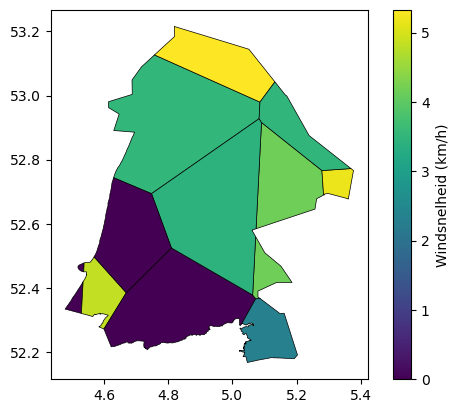

In [7]:
api_data = gpd.GeoDataFrame(api_data, geometry=gpd.GeoSeries.from_wkt(api_data['WKT']))
first = api_data[api_data['datetime'] == date(2021, 2, 1)]
first.plot(linewidth=0.5, edgecolor='k',column='Windsnelheid (km/h)', legend=True, legend_kwds={"label": "Windsnelheid (km/h)"})
# api_data['datetime'][0]

<Axes: >

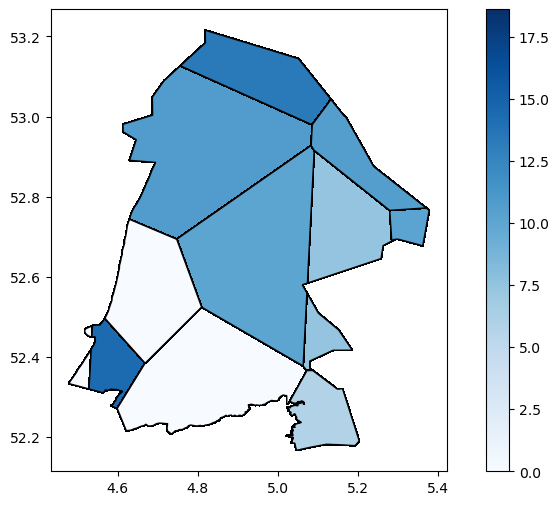

In [16]:
# selected_verdieping = st.slider("Selecteer een dag", range(gdf_jmh['verdieping'].min(), gdf_jmh['verdieping'].max() + 1)), index=0, key=1)
# gdf_selected_verdieping = gdf_jmh[gdf_jmh['verdieping'] == selected_verdieping]
# max_clients_per_geometry_verdieping = gdf_selected_verdieping.groupby('geometry')['num_clients'].mean().reset_index()
# max_clients_per_geometry_verdieping = gpd.GeoDataFrame(max_clients_per_geometry_verdieping, geometry='geometry')
# max_clients_per_geometry_verdieping_met_naam = gdf_jmh.merge(max_clients_per_geometry_verdieping, on='geometry').drop_duplicates(subset='geometry').drop(columns=['num_clients_x', 'verdieping'])
# max_clients_per_geometry_verdieping_met_naam = gpd.GeoDataFrame(max_clients_per_geometry_verdieping_met_naam, geometry='geometry')
# Plot de rasterkaart met kleuren op basis van 'num_clients'
fig, ax = plt.subplots(figsize=(10, 6))
api_data.plot(column='Windsnelheid (km/h)', legend=True, cmap='Blues', ax=ax, edgecolor='black')
